
## <center> Social and Information Networks CSE3021<br>

<left> Karthik Valmeekam (15BCE0175) <br> Rishab Jain (15BCE0308) <br> Siddharth Bhargava (15BCE0628) <br><br> Professor Annapurna J. <br> Slot A1 + TA1


### Digital Assignment 2: Exploring NetworkX to analyse social networks <br>


Social Network Analysis (SNA) has a wide applicability in many scientific fields and industries. This workshop is a gentle introduction to SNA using Python and NetworkX, a powerful and mature python library for the study of the structure, dynamics, and functions of complex networks.

#### Creating and Manipulating Graphs using NetworkX 
NetworkX is a python package for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks.

Features: <br>
•	Data structures for graphs, digraphs, and multigraphs <br>
•	Many standard graph algorithms <br>
•	Network structure and analysis measures <br>
•	Generators for classic graphs, random graphs, and synthetic networks <br>
•	Nodes can be "anything" (e.g., text, images, XML records) <br>
•	Edges can hold arbitrary data (e.g., weights, time-series) <br> 
•	Open source 3-clause BSD license <br>
•	Well tested with over 90% code coverage <br>
•	Additional benefits from Python include fast prototyping, easy to teach, and multi-platform <br>


We shall first implement a random network below and test out some basic properties on it and then n=move on to a real world dataset.

In [2]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from operator import itemgetter
%matplotlib notebook

In [17]:
G = nx.gnp_random_graph(12, 0.3, seed=None, directed=False) #used to create Erdos-Renyi graph with n=12, p=0.3

<IPython.core.display.Javascript object>


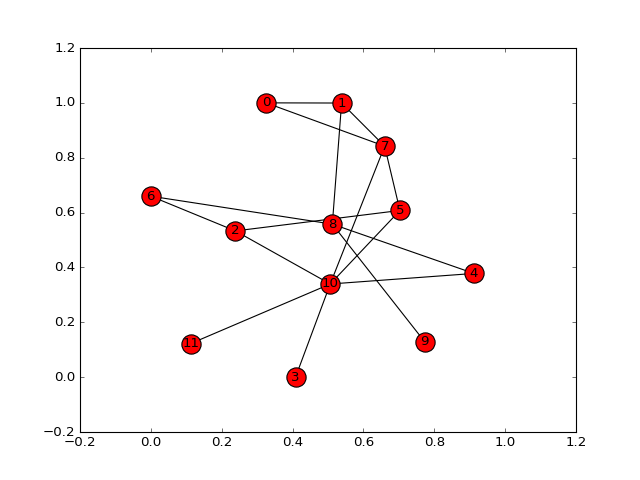

In [19]:
plt.figure()
nx.draw_networkx(G)

In [101]:
T = nx.edges(G)
T

[(0, 9),
 (0, 5),
 (0, 6),
 (1, 4),
 (1, 5),
 (1, 6),
 (1, 8),
 (1, 10),
 (1, 11),
 (2, 9),
 (3, 8),
 (3, 9),
 (3, 10),
 (3, 11),
 (3, 6),
 (4, 8),
 (4, 9),
 (5, 10),
 (5, 11),
 (5, 7),
 (8, 11),
 (8, 9),
 (9, 10),
 (9, 11)]

In [20]:
#number of connected components in graph and robustness of network
print nx.number_connected_components(G)
print nx.minimum_node_cut(G) #number of nodes that need to be removed to disconnect the graph

1
set([10])


In [21]:
#distance measures
print nx.eccentricity(G)
print nx.diameter(G)

{0: 3, 1: 3, 2: 3, 3: 4, 4: 3, 5: 4, 6: 3, 7: 3, 8: 3, 9: 4, 10: 3, 11: 4}
4


### Real World Graphs using networkx:

We can also load graphs from text files, dataframes,etc using networkx. The data stored can be in the form of adjacency list, adjacency matrix or edgelist. The library is capable of reading different files using respective commands.

We have selected a dataset on facebook ego-nets from the website, https://snap.stanford.edu/data/egonets-Facebook.html. We first import the dataset using networkx and then perform the analysis and visualisation of the network.

In [9]:
from community import community_louvain

In [10]:
G_fb = nx.read_edgelist("facebook_combined.txt", create_using = nx.Graph(), nodetype=int)

<br><BR>

<br><br>

<IPython.core.display.Javascript object>


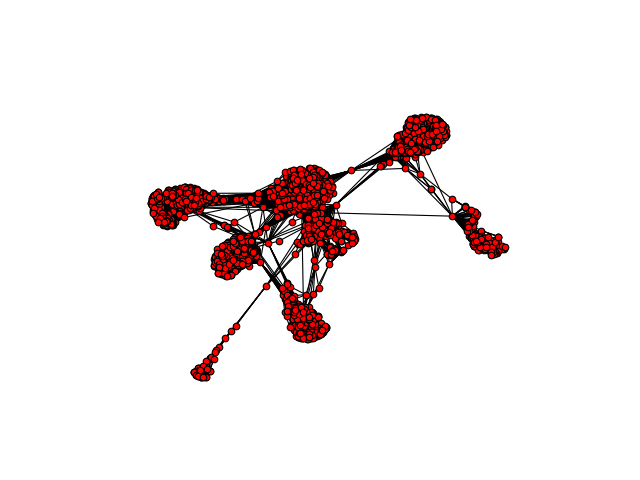

In [11]:
#create network layout for visualisation 
plt.figure()
spring_pos = nx.spring_layout(G_fb)
plt.axis("off")
nx.draw_networkx(G_fb, pos= spring_pos, with_labels=False, node_size=35)

In [12]:
print nx.info(G_fb)

Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88234
Average degree:  43.6910


In [90]:
#Centrality Measures of the nodes in graph

degc = nx.degree_centrality(G_fb)
degcl = nx.closeness_centrality(G_fb)
degb = nx.betweenness_centrality(G_fb)
eig = nx.eigenvector_centrality(G_fb)

cent_measures = {
    'Degree': degc,
    'Closeness': degcl,
    'Betweenness': degb,
    'Eigen Vector': eig,
}

centrality = pd.DataFrame(cent_measures)
centrality

,Betweenness,Closeness,Degree,Eigen Vector
0,1.463059e-01,0.353343,0.085934,3.387800e-05
1,2.783274e-06,0.261376,0.004210,6.041513e-07
2,7.595021e-08,0.261258,0.002476,2.230011e-07
3,1.685066e-06,0.261376,0.004210,6.631754e-07
4,1.840332e-07,0.261258,0.002476,2.232983e-07
5,2.205964e-06,0.261308,0.003219,1.182944e-06
6,2.453776e-08,0.261190,0.001486,2.167582e-07
7,1.702985e-04,0.274769,0.004953,2.568434e-05
8,2.760498e-07,0.261224,0.001981,2.194001e-07
9,1.645424e-05,0.262055,0.014116,2.213548e-06


In [107]:
#clustering coefficient (local and global)
print nx.clustering(G_fb, 2369) # LCC for node 2369
print nx.transitivity(G_fb) # GCC using transitivity concept
print nx.average_clustering(G_fb) #GCC using average clustering concept

0.741220346006
0.519174277543
0.60554671862


In [95]:
#community detection using Louvain method

parts = community_louvain.best_partition(G_fb)
values= [parts.get(node) for node in G_fb.nodes()]

<IPython.core.display.Javascript object>


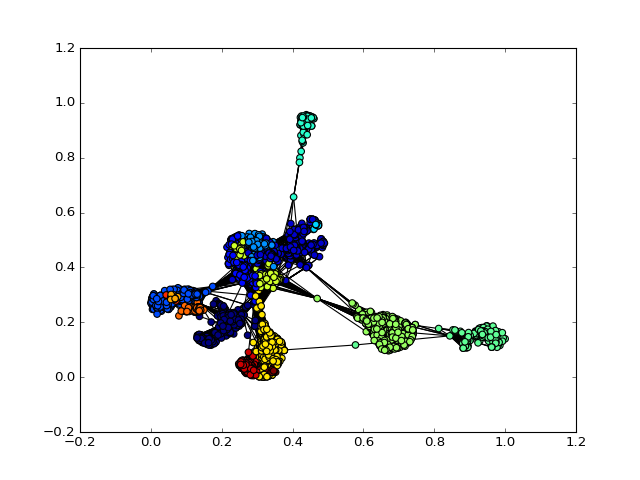

In [96]:
plt.axis("off")
plt.figure()
nx.draw_networkx(G_fb, pos= spring_pos, cmap = plt.get_cmap("jet"), node_color=values, node_size=35, with_labels=False)